# Mini Project

## 자전거 수요량 예측 데이터 분석  
https://www.kaggle.com/c/bike-sharing-demand



### 1. 가설 설정
데이터 분석 전에 데이터 간의 연관성에 대한 임의의 가설 설정하기
- 날씨가 맑고 바람이 많이 부는 날에 자전거 대여수가 많을 것이다.
- 봄과 가을에 자전거를 더 많이 탈 것이다.
- 출퇴근 시간(8:00-10:00, 18:00-20:00)에 자전거를 더 많이 탈 것이다.
- Count 대비 registered의 비율은 온도변화와 전혀 관계가 없을 것이다. 

### 2. 데이터 시각화 
4종류 이상의 시각화 기법을 사용하여 그래프 그리기
Seaborn 라이브러리 활용

### 3. 데이터 분석
각 그래프로부터 얻을 수 있는 의미 도출

### 4. 최초의 가설 검정
가설이 유의미한지 여부 판단하기

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 읽어드릴 파일 경로 : /dataset/bike_sharing_demand_train.csv
filepath = "./dataset/bike_sharing_demand_train.csv"
data = pd.read_csv(filepath)
print(data)

                  datetime  season  holiday  workingday  weather   temp  \
0      2011-01-01 00:00:00       1        0           0        1   9.84   
1      2011-01-01 01:00:00       1        0           0        1   9.02   
2      2011-01-01 02:00:00       1        0           0        1   9.02   
3      2011-01-01 03:00:00       1        0           0        1   9.84   
4      2011-01-01 04:00:00       1        0           0        1   9.84   
...                    ...     ...      ...         ...      ...    ...   
10881  2012-12-19 19:00:00       4        0           1        1  15.58   
10882  2012-12-19 20:00:00       4        0           1        1  14.76   
10883  2012-12-19 21:00:00       4        0           1        1  13.94   
10884  2012-12-19 22:00:00       4        0           1        1  13.94   
10885  2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  
0      14.395        81     0.0000 

In [3]:
# 데이터 타입 변경: object > datetime
data['datetime'] = data['datetime'].astype('datetime64')

In [4]:
data.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [5]:
#연, 월, 일, 시, 분, 초 쪼개기
data['year']=data['datetime'].dt.year
data['month']=data['datetime'].dt.month
data['day']=data['datetime'].dt.day
data['hour']=data['datetime'].dt.hour
data['minute']=data['datetime'].dt.minute
data['second']=data['datetime'].dt.second

In [6]:
data['re_count'] = data['registered'] / data['count']
print(data)

                 datetime  season  holiday  workingday  weather   temp  \
0     2011-01-01 00:00:00       1        0           0        1   9.84   
1     2011-01-01 01:00:00       1        0           0        1   9.02   
2     2011-01-01 02:00:00       1        0           0        1   9.02   
3     2011-01-01 03:00:00       1        0           0        1   9.84   
4     2011-01-01 04:00:00       1        0           0        1   9.84   
...                   ...     ...      ...         ...      ...    ...   
10881 2012-12-19 19:00:00       4        0           1        1  15.58   
10882 2012-12-19 20:00:00       4        0           1        1  14.76   
10883 2012-12-19 21:00:00       4        0           1        1  13.94   
10884 2012-12-19 22:00:00       4        0           1        1  13.94   
10885 2012-12-19 23:00:00       4        0           1        1  13.12   

        atemp  humidity  windspeed  casual  registered  count  year  month  \
0      14.395        81     0.000

#### 1) 날씨가 맑고 바람이 많이 부는 날에 자전거 대여수가 많을 것이다.

In [7]:
# 별 그룹 바이
plt.figure(figsize=(12, 3))
ttl_count_by_weather = data.groupby('weather').sum()
ttl_count_by_weather

,season,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,re_count
weather,,,,,,,,,,,,,,,,,
1,17959,204,4839,147846.82,172565.755,407907,92723.1626,289900,1186163,1476063,14466721,46599,71858,84390,0,0,5899.193218
2,7171,92,1937,55587.80,65387.220,195831,34517.8506,87246,419914,507160,5700642,18795,28633,31035,0,0,2375.116614
3,2156,15,635,16790.32,19544.905,69872,12087.2020,14983,87106,102089,1727835,5598,8279,10199,0,0,749.129203
4,1,0,1,8.20,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0,0.963415


<Figure size 864x216 with 0 Axes>

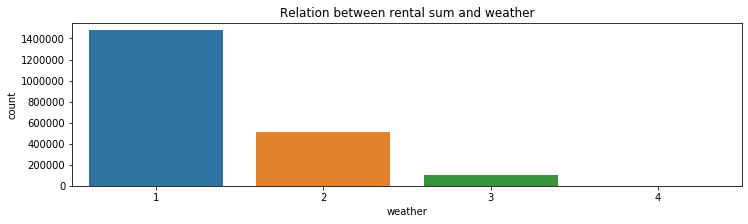

In [8]:
plt.figure(figsize=(12, 3))
plt.title("Relation between rental sum and weather")
sns.barplot(data = ttl_count_by_weather, x = ttl_count_by_weather.index, y = "count")

#### 2) 봄과 가을에 자전거를 더 많이 탈 것이다.

In [9]:
# 계절별 그룹 바이
plt.figure(figsize=(12, 3))
ttl_count_by_season = data.groupby('season').sum()
ttl_count_by_season

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,re_count
season,,,,,,,,,,,,,,,,,
1,71,1828,3826,33656.90,40904.975,151216,39314.9233,41605,270893,312498,5402909,5389,26776,31272,0,0,2373.205775
2,48,1893,3889,62376.58,72826.520,166311,36637.5229,129672,458610,588282,5497429,13668,27336,31454,0,0,2154.510226
3,96,1845,3735,78680.64,88933.960,175250,31453.7195,142718,497944,640662,5497431,21861,27334,31458,0,0,2127.529676
4,96,1846,3991,45519.02,54843.790,180919,31928.0527,78140,465894,544034,5499441,30075,27333,31458,0,0,2369.156773


<Figure size 864x216 with 0 Axes>

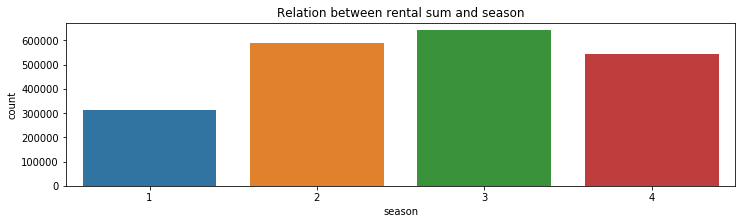

In [10]:
plt.figure(figsize=(12, 3))
plt.title("Relation between rental sum and season")
sns.barplot(data = ttl_count_by_season, x = ttl_count_by_season.index, y = "count")

#### 3) 출퇴근 시간(8:00-10:00, 18:00-20:00)에 자전거를 더 많이 탈 것이다.

In [11]:
# 시간별 그룹 바이
plt.figure(figsize=(12, 3))
ttl_count_by_hour = data.groupby('hour').sum()
ttl_count_by_hour

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,minute,second,re_count
hour,,,,,,,,,,,,,,,,,
0,1139,13,310,634,8651.00,10220.475,30976,4869.2116,4692,20396,25088,915233,2963,4542,0,0,375.937824
1,1136,13,309,650,8462.40,9993.210,31590,4730.1531,2957,12415,15372,913222,2954,4536,0,0,371.507503
2,1130,13,305,628,8268.06,9776.535,31639,4536.1412,2159,8100,10259,901155,2939,4468,0,0,358.127583
3,1107,12,289,607,7981.88,9445.465,31303,4405.0892,1161,3930,5091,870985,2900,4327,0,0,356.914739
4,1125,13,297,631,7972.04,9437.910,32549,4737.1814,558,2274,2832,889089,2934,4413,0,0,370.872697
5,1136,13,310,643,7959.74,9438.665,33181,4548.2079,658,8277,8935,909200,2957,4521,0,0,412.528289
6,1139,13,310,660,7954.00,9428.850,33640,4747.1979,1888,32810,34698,915233,2963,4542,0,0,415.215731
7,1139,13,310,673,8093.40,9571.225,32893,4950.0739,4966,92002,96968,915233,2963,4542,0,0,415.824069
8,1139,13,310,667,8400.08,9919.745,31647,5363.1557,9802,155258,165060,915233,2963,4542,0,0,414.609037


<Figure size 864x216 with 0 Axes>

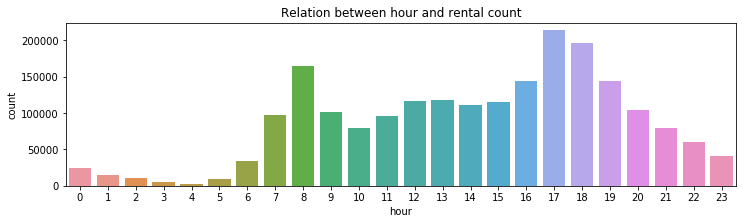

In [12]:
plt.figure(figsize=(12, 3))
plt.title("Relation between hour and rental count")
sns.barplot(data = ttl_count_by_hour, x = ttl_count_by_hour.index, y = "count")

#### 4) Count 대비 registered의 비율은 온도변화와 전혀 관계가 없을 것이다. 

Text(0.5, 0, 'datetime')

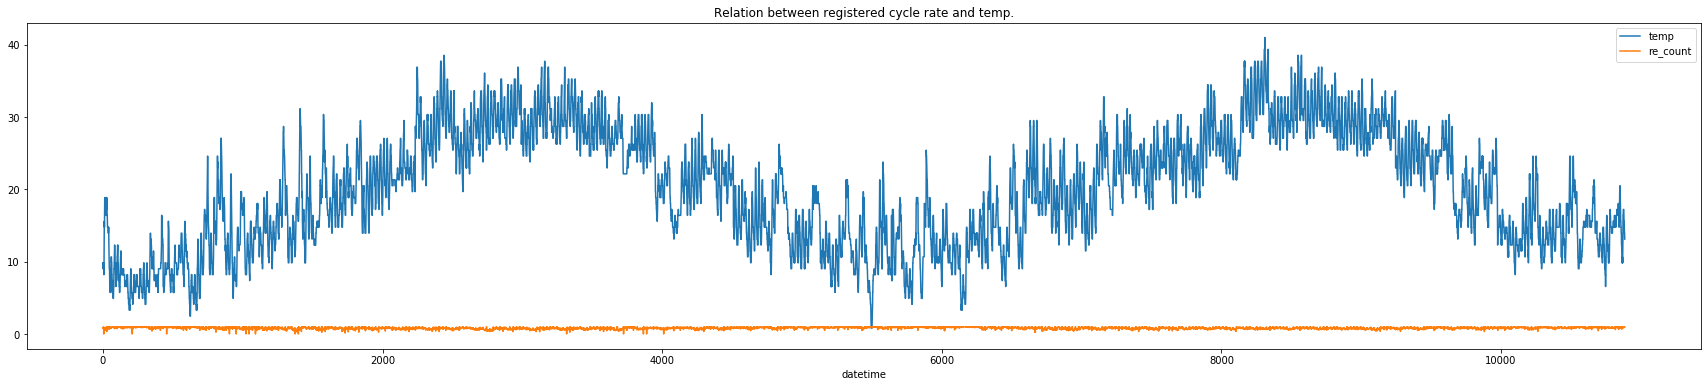

In [13]:
plt.figure(figsize=(30,6)) 

plt.title("Relation between registered cycle rate and temp.")

# 선그래프 그리기
sns.lineplot(data=data['temp'], label="temp") 
sns.lineplot(data=data['re_count'], label="re_count")

plt.xlabel("datetime")